In [5]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
crashes = pd.read_csv('traffic_crashes.csv')
crashes.head()

,RD_NO,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,JC334993,NaN,07/04/2019 10:33:00 PM,45,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,NaN,NaN,NaN,NaN,22,5,7,41.886140,-87.614274,POINT (-87.614274106164 41.8861404879)
1,JC370822,NaN,07/30/2019 10:22:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,DIVIDED - W/MEDIAN (NOT RAISED),...,NaN,NaN,NaN,NaN,10,3,7,41.745549,-87.614670,POINT (-87.614669906271 41.745549113377)
2,JC387098,NaN,08/10/2019 05:00:00 PM,25,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,...,NaN,NaN,NaN,NaN,17,7,8,41.772004,-87.581234,POINT (-87.58123401629 41.772004323752)
3,JC395195,NaN,08/16/2019 04:53:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,...,0.0,0.0,1.0,0.0,16,6,8,41.892327,-87.635742,POINT (-87.635741843096 41.89232650689)
4,JC396604,NaN,08/17/2019 04:04:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,PARKING LOT,...,0.0,0.0,1.0,0.0,16,7,8,41.948637,-87.688458,POINT (-87.688457506457 41.948636883802)


In [7]:
crashes = crashes[["CRASH_DATE","TRAFFICWAY_TYPE", "ROADWAY_SURFACE_COND", "LIGHTING_CONDITION", "POSTED_SPEED_LIMIT", "ROAD_DEFECT", "MOST_SEVERE_INJURY", "INJURIES_FATAL", "DAMAGE", "CRASH_HOUR", "CRASH_TYPE"]].copy()
crashes.head()

,CRASH_DATE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,POSTED_SPEED_LIMIT,ROAD_DEFECT,MOST_SEVERE_INJURY,INJURIES_FATAL,DAMAGE,CRASH_HOUR,CRASH_TYPE
0,07/04/2019 10:33:00 PM,DIVIDED - W/MEDIAN BARRIER,DRY,"DARKNESS, LIGHTED ROAD",45,NO DEFECTS,NaN,NaN,"OVER $1,500",22,NO INJURY / DRIVE AWAY
1,07/30/2019 10:22:00 AM,DIVIDED - W/MEDIAN (NOT RAISED),DRY,DAYLIGHT,30,NO DEFECTS,NaN,NaN,"OVER $1,500",10,NO INJURY / DRIVE AWAY
2,08/10/2019 05:00:00 PM,ONE-WAY,DRY,DAYLIGHT,25,NO DEFECTS,NaN,NaN,"$501 - $1,500",17,NO INJURY / DRIVE AWAY
3,08/16/2019 04:53:00 PM,NOT DIVIDED,DRY,DAYLIGHT,30,NO DEFECTS,NO INDICATION OF INJURY,0.0,"$501 - $1,500",16,NO INJURY / DRIVE AWAY
4,08/17/2019 04:04:00 PM,PARKING LOT,DRY,DAYLIGHT,30,NO DEFECTS,NO INDICATION OF INJURY,0.0,"$501 - $1,500",16,NO INJURY / DRIVE AWAY


In [8]:
crashes["ROADWAY_SURFACE_COND"].value_counts()

DRY                263718
WET                 48731
UNKNOWN             22967
SNOW OR SLUSH       11975
ICE                  2445
OTHER                 832
SAND, MUD, DIRT       177
Name: ROADWAY_SURFACE_COND, dtype: int64

In [9]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit([1,2,3,4,5,6,7])
le.classes_
le.transform([1,2,3,4,5,6,7])
le.inverse_transform([1,2,3,4,5,6])

array([2, 3, 4, 5, 6, 7])

In [10]:
le = preprocessing.LabelEncoder()
le.fit(["DRY", "ICE", "SNOW OR SLUSH", "SAND,MUD, DIRT", "OTHER"])

list(le.classes_)

le.transform(["DRY", "ICE", "SNOW OR SLUSH", "SAND,MUD, DIRT", "OTHER"]) 

list(le.inverse_transform([1,2,3,4]))



['ICE', 'OTHER', 'SAND,MUD, DIRT', 'SNOW OR SLUSH']

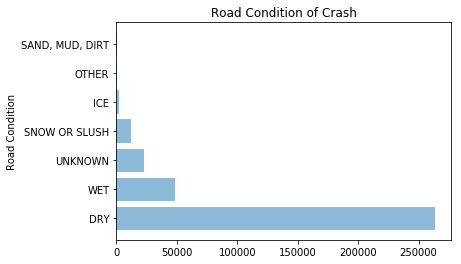

In [11]:
objects = ("DRY", "WET", "UNKNOWN", "SNOW OR SLUSH", "ICE","OTHER","SAND, MUD, DIRT")
y_pos = np.arange(len(objects))
performance = [263718,48731,22967,11975,2445,832,177]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.ylabel('Road Condition')
plt.title('Road Condition of Crash')

plt.show()

In [12]:
crashes = crashes[["CRASH_DATE","TRAFFICWAY_TYPE", "ROADWAY_SURFACE_COND", "LIGHTING_CONDITION", "POSTED_SPEED_LIMIT", "ROAD_DEFECT", "MOST_SEVERE_INJURY", "INJURIES_FATAL", "DAMAGE", "CRASH_HOUR", "CRASH_TYPE"]].copy()
crashes.head()

,CRASH_DATE,TRAFFICWAY_TYPE,ROADWAY_SURFACE_COND,LIGHTING_CONDITION,POSTED_SPEED_LIMIT,ROAD_DEFECT,MOST_SEVERE_INJURY,INJURIES_FATAL,DAMAGE,CRASH_HOUR,CRASH_TYPE
0,07/04/2019 10:33:00 PM,DIVIDED - W/MEDIAN BARRIER,DRY,"DARKNESS, LIGHTED ROAD",45,NO DEFECTS,NaN,NaN,"OVER $1,500",22,NO INJURY / DRIVE AWAY
1,07/30/2019 10:22:00 AM,DIVIDED - W/MEDIAN (NOT RAISED),DRY,DAYLIGHT,30,NO DEFECTS,NaN,NaN,"OVER $1,500",10,NO INJURY / DRIVE AWAY
2,08/10/2019 05:00:00 PM,ONE-WAY,DRY,DAYLIGHT,25,NO DEFECTS,NaN,NaN,"$501 - $1,500",17,NO INJURY / DRIVE AWAY
3,08/16/2019 04:53:00 PM,NOT DIVIDED,DRY,DAYLIGHT,30,NO DEFECTS,NO INDICATION OF INJURY,0.0,"$501 - $1,500",16,NO INJURY / DRIVE AWAY
4,08/17/2019 04:04:00 PM,PARKING LOT,DRY,DAYLIGHT,30,NO DEFECTS,NO INDICATION OF INJURY,0.0,"$501 - $1,500",16,NO INJURY / DRIVE AWAY


In [31]:
new_cols_data = crashes[["CRASH_TYPE","POSTED_SPEED_LIMIT", "CRASH_HOUR", "ROADWAY_SURFACE_COND"]].copy()

# new_cols_data

new_cols_data.head()

,CRASH_TYPE,POSTED_SPEED_LIMIT,CRASH_HOUR,ROADWAY_SURFACE_COND
0,NO INJURY / DRIVE AWAY,45,22,DRY
1,NO INJURY / DRIVE AWAY,30,10,DRY
2,NO INJURY / DRIVE AWAY,25,17,DRY
3,NO INJURY / DRIVE AWAY,30,16,DRY
4,NO INJURY / DRIVE AWAY,30,16,DRY


In [33]:
ROADWAY_SURFACE_COND_it_df = new_cols_data[["CRASH_TYPE", "ROADWAY_SURFACE_COND"]].copy()
ROADWAY_SURFACE_COND_if_df = new_cols_data[["CRASH_TYPE", "ROADWAY_SURFACE_COND"]].copy()

ROADWAY_SURFACE_COND_if_df.head()

,CRASH_TYPE,ROADWAY_SURFACE_COND
0,NO INJURY / DRIVE AWAY,DRY
1,NO INJURY / DRIVE AWAY,DRY
2,NO INJURY / DRIVE AWAY,DRY
3,NO INJURY / DRIVE AWAY,DRY
4,NO INJURY / DRIVE AWAY,DRY


In [34]:
convert_cat_data = {'DRY':'no','WET':'yes','UNKNOWN':'no','SNOW OR SLUSH':'yes','ICE':'yes','OTHER':'yes','SAND, MUD, DIRT':'yes'}
ROADWAY_SURFACE_COND_it_df = ROADWAY_SURFACE_COND_it_df.replace(convert_cat_data)
ROADWAY_SURFACE_COND_df = ROADWAY_SURFACE_COND_if_df.replace(convert_cat_data)

In [36]:
ROADWAY_SURFACE_COND_it_df = pd.get_dummies(ROADWAY_SURFACE_COND_it_df)
ROADWAY_SURFACE_COND_if_df = pd.get_dummies(ROADWAY_SURFACE_COND_if_df)

ROADWAY_SURFACE_COND_it_df.head()

,CRASH_TYPE_INJURY AND / OR TOW DUE TO CRASH,CRASH_TYPE_NO INJURY / DRIVE AWAY,ROADWAY_SURFACE_COND_no,ROADWAY_SURFACE_COND_yes
0,0,1,1,0
1,0,1,1,0
2,0,1,1,0
3,0,1,1,0
4,0,1,1,0


In [38]:
# Assign X (data) and y (target)

X = ROADWAY_SURFACE_COND_it_df[['ROADWAY_SURFACE_COND_no', 'ROADWAY_SURFACE_COND_yes']]
# X = weather_condition_if_df[['WEATHER_CONDITION_no', 'WEATHER_CONDITION_yes']]

y = ROADWAY_SURFACE_COND_it_df['CRASH_TYPE_NO INJURY / DRIVE AWAY'].values.reshape(-1, 1)
# y = weather_condition_if_df["INJURIES_FATAL"].values.reshape(-1, 1)

print(X.shape, y.shape)

(350845, 2) (350845, 1)


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [40]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [41]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [42]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [43]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)


print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9900081787239051, R2: 0.003974106787943632


In [44]:
from sklearn.linear_model import Lasso

### BEGIN SOLUTION
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.990154403629146, R2: 0.0038269930620346004


In [45]:
from sklearn.linear_model import Ridge

### BEGIN SOLUTION
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9900081787293378, R2: 0.003974106782477782


In [46]:
from sklearn.linear_model import ElasticNet

### BEGIN SOLUTION
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9900585060730106, R2: 0.00392347352659983


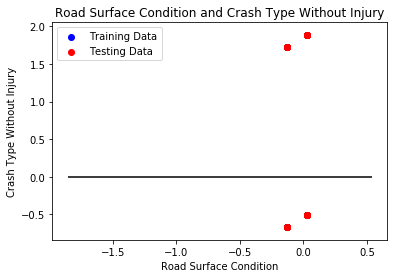

In [48]:
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.xlabel("Road Surface Condition")
plt.ylabel("Crash Type Without Injury")
plt.title("Road Surface Condition and Crash Type Without Injury")
plt.savefig('crash_no_injury_vs_ROADWAY_SURFACE_COND.png')
plt.show()